### Part 2: Apply Dimensionality Reduction

In [1]:
# Import Dependencies and Libraries
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Loading the preprocessed myopia dataset
file_path = Path("Resources\\clean_myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [3]:
# Applying PCA to reduce dimensions
# For desired explained variance preserve 90% of the explained variance in dimensionality reduction
# Initialize PCA model
pca = PCA(n_components=0.90)
myopia_pca = pca.fit_transform(df_myopia)

In [4]:
myopia_pca

array([[ 5.35502713e-01,  1.14500427e+00, -1.38501894e+00, ...,
        -1.92299652e+00,  2.67528503e-02,  1.78143856e-01],
       [-6.24705593e-01, -1.57578643e+00, -7.94253057e-01, ...,
         2.85332291e-01,  6.89682613e-01, -5.57030831e-01],
       [-9.33479366e-01, -7.17076224e-01,  8.20149929e-01, ...,
        -3.08170124e-02, -4.31499076e-01,  1.33358217e-02],
       ...,
       [-8.90082017e-01, -2.30800520e+00,  2.68101833e-01, ...,
        -4.89876908e-01,  1.82269069e+00,  8.17765449e-02],
       [-1.12399979e+00,  4.51889784e-01,  1.65865634e-03, ...,
         2.39685015e-01, -1.59282241e+00, -1.01458084e+00],
       [-6.91533913e-01, -7.37046188e-01, -1.05290000e+00, ...,
        -2.73804495e-01,  9.46160724e-01,  4.95797353e-01]])

In [14]:
# Create a dataframe from the PCA output to work with t-SNE
myopia_df = pd.DataFrame(myopia_pca)

In [13]:
myopia_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [15]:
# Import proper dependency/library to run t-SNE
from sklearn.manifold import TSNE

#### What learning rate should I use to initialize t-SNE?
https://stats.stackexchange.com/questions/222912/how-to-determine-parameters-for-t-sne-for-reducing-dimensions
<br>"It's a good idea to try perplexity of 5, 30, and 50, and look at the results."

In [16]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [17]:
# Reduce dimensions
tsne_features = tsne.fit_transform(myopia_df)

In [18]:
# Obtain how many columns the dataset contains
tsne_features.shape

(618, 2)

In [19]:
# Prepare to plot the dataset
# The first column of transformed features
myopia_df['x'] = tsne_features[:,0]

# The second column of transformed features
myopia_df['y'] = tsne_features[:,1]

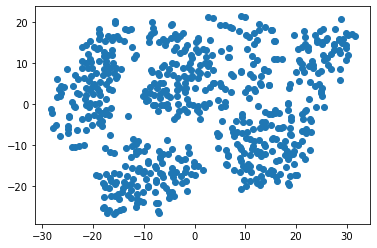

In [20]:
# Visualize the clusters
plt.scatter(myopia_df['x'], myopia_df['y'])
plt.show()

The original dataframe for myopic data had 15 columns. We cleaned it and reduced it to 14 columns. Running PCA and using a desired explained variance set to preserve 90% of the data reduced the myopic dataframe to 9 columns. Initializing t-SNE with learning rate set at 35 allowed us to further reduce the dataframe to 2 columns; we see this in the ```tsne_features.shape line``` of code. From the scatter plot, we can see that t-SNE has grouped the data into about 5 to 6 distinct clusters.

### Part 3: Perform a Cluster Analysis with K-means

In [22]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_df)
    inertia.append(km.inertia_)

C:\Users\stefa\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


In [26]:
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,255303.196133
1,2,140761.354778
2,3,93359.377905
3,4,62936.188807
4,5,44575.035480
5,6,38286.709060
6,7,33209.798239
7,8,29662.603914
8,9,26428.433489
9,10,23466.914827


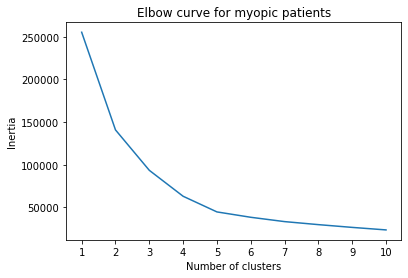

In [25]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopic patients')
plt.show()

By analyzing the elbow's dataframe and plot we can come to the conclusion that 5 is the value of k at which it appears.

### Part 4: Make a Recommendation

By completing an examination of the myopia data with unsupervised learning models we can determine that it might be more effective to split the patients up into groups. According to our analysis it would be most efficient to cluster the patients into 5 different groups.